In [1]:
import os
import pathlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
# load the dataset directory
data_dir = pathlib.Path("C:/Users/DHARSINI/ibm/flowers")
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

4317

In [5]:
# plot samples
def plot_by_type(flower_type):
    type_dir = list(data_dir.glob(flower_type + "/*.jpg"))
    type_count = len(list(type_dir))
    if (type_count == 0):
        print("Invalid flower class!")
    else:
        PLOT_COUNT = 9
        ROW = 3
        COL = 3
        image_indices = [np.random.randint(0,type_count) for count in range(PLOT_COUNT)]
        
        plt.figure(figsize=(20,20))
        for images in range(PLOT_COUNT):
            plt.subplot(ROW, COL, images+1)
            plt.imshow(cv2.imread(str(type_dir[image_indices[images]]))[:,:,::-1])

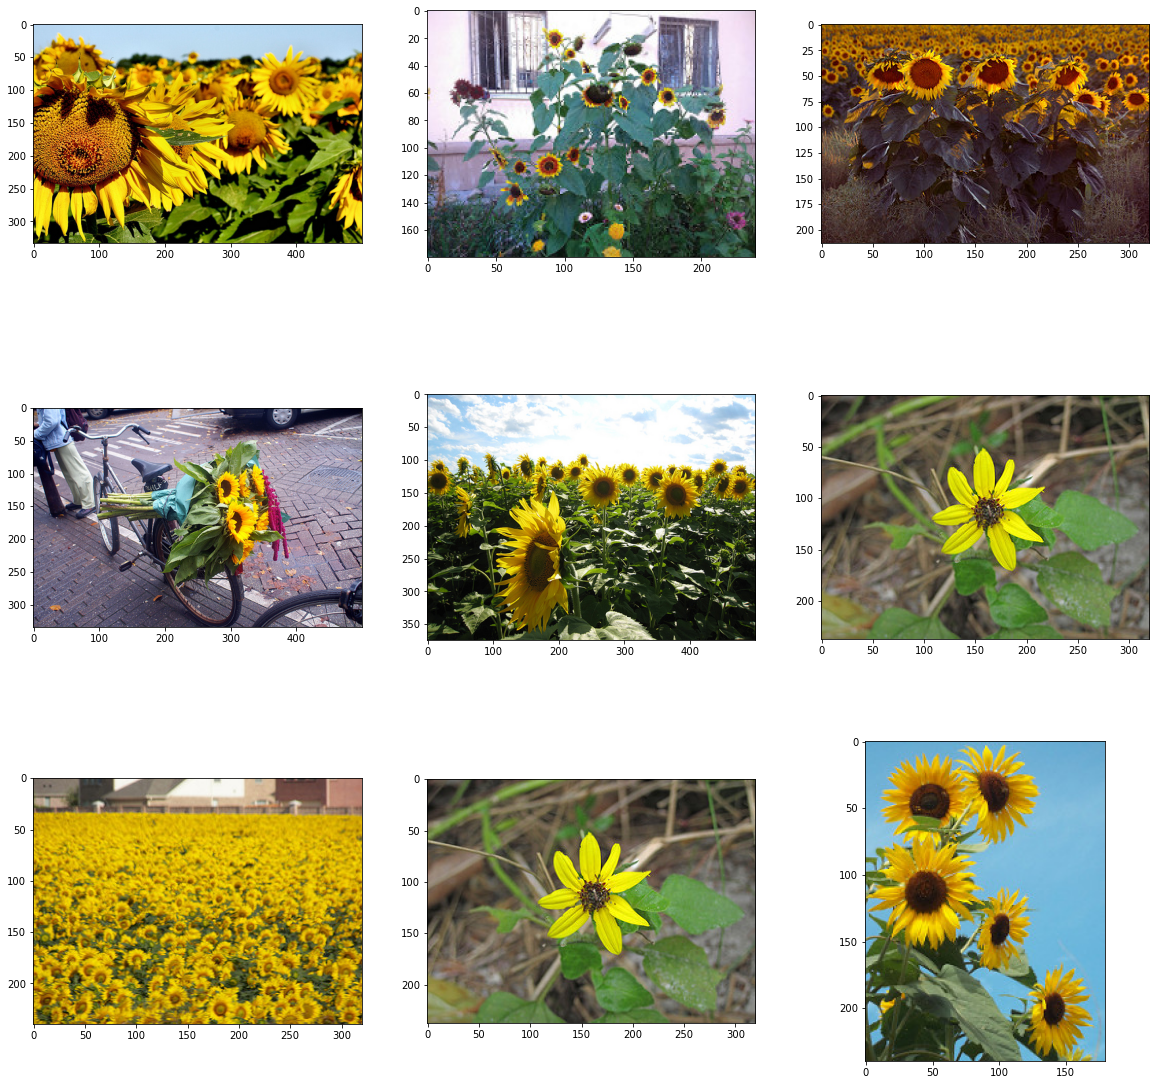

In [6]:
# example
plot_by_type("sunflower")

In [7]:
# load images off disk using keras.utils.image_dataset_from_directory
# set parameters
batch_size = 32
img_height = 180
img_width = 180

In [8]:
# training set
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [9]:
# validation and testing set
val_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [10]:
# create separate validation and testing datasets
val_test_size = len(val_test_ds)
val_test_ds = val_test_ds.shuffle(50)
val_ds = val_test_ds.take(int(0.5*val_test_size))
test_ds = val_test_ds.skip(int(0.5*val_test_size))

In [11]:
# train without augmentation
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
108/108 [==============================] - 93s 848ms/step - loss: 1.2897 - accuracy: 0.4369 - val_loss: 1.1329 - val_accuracy: 0.4832
Epoch 2/10
108/108 [==============================] - 89s 823ms/step - loss: 1.0186 - accuracy: 0.6138 - val_loss: 0.9867 - val_accuracy: 0.6120
Epoch 3/10
108/108 [==============================] - 91s 841ms/step - loss: 0.8519 - accuracy: 0.6807 - val_loss: 0.9437 - val_accuracy: 0.6482
Epoch 4/10
108/108 [==============================] - 91s 839ms/step - loss: 0.6695 - accuracy: 0.7499 - val_loss: 1.0125 - val_accuracy: 0.6506
Epoch 5/10
108/108 [==============================] - 91s 845ms/step - loss: 0.4986 - accuracy: 0.8121 - val_loss: 1.1422 - val_accuracy: 0.6178
Epoch 6/10
108/108 [==============================] - 101s 936ms/step - loss: 0.3221 - accuracy: 0.8911 - val_loss: 1.2275 - val_accuracy: 0.6394
Epoch 7/10
108/108 [==============================] - 95s 880ms/step - loss: 0.2083 - accuracy: 0.9323 - val_loss: 1.5399 - val_a

In [14]:
# testing model without augmentation
model.evaluate(
    test_ds
)

14/14 [==============================] - 4s 200ms/step - loss: 2.0439 - accuracy: 0.6510


[2.043910264968872, 0.6510066986083984]

In [15]:
# define augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

In [16]:
# train with augmentation
num_classes = 5

model_with_augmentation = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model_with_augmentation.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model_with_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
108/108 [==============================] - 105s 958ms/step - loss: 1.2581 - accuracy: 0.4624 - val_loss: 1.1673 - val_accuracy: 0.4591
Epoch 2/15
108/108 [==============================] - 105s 975ms/step - loss: 1.0654 - accuracy: 0.5773 - val_loss: 1.0105 - val_accuracy: 0.5817
Epoch 3/15
108/108 [==============================] - 101s 938ms/step - loss: 0.9665 - accuracy: 0.6251 - val_loss: 0.9655 - val_accuracy: 0.6178
Epoch 4/15
108/108 [==============================] - 103s 948ms/step - loss: 0.9470 - accuracy: 0.6259 - val_loss: 1.0633 - val_accuracy: 0.5745
Epoch 5/15
108/108 [==============================] - 99s 917ms/step - loss: 0.8889 - accuracy: 0.6592 - val_loss: 0.8695 - val_accuracy: 0.6394
Epoch 6/15
108/108 [==============================] - 90s 832ms/step - loss: 0.8504 - accuracy: 0.6720 - val_loss: 0.7969 - val_accuracy: 0.6875
Epoch 7/15
108/108 [==============================] - 90s 830ms/step - loss: 0.8318 - accuracy: 0.6818 - val_loss: 0.8626 - va

In [19]:
# testing model with augmentation
model_with_augmentation.evaluate(
    test_ds
)

14/14 [==============================] - 4s 201ms/step - loss: 0.7459 - accuracy: 0.7226


[0.745883047580719, 0.7225950956344604]